In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from plotly import express as px


In [7]:
data=pd.read_csv('US_Accidents_Dec20_Updated.csv')
ad = data.dropna()

C:\Users\Jain\AppData\Local\Programs\Python\Python312\Scripts\ipykernel_11096\2624335321.py:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('US_Accidents_Dec20_Updated.csv')


In [8]:
ad.info()
ad.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7661 entries, 0 to 42761
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     7661 non-null   object 
 1   Severity               7661 non-null   int64  
 2   Start_Time             7661 non-null   object 
 3   End_Time               7661 non-null   object 
 4   Start_Lat              7661 non-null   float64
 5   Start_Lng              7661 non-null   float64
 6   End_Lat                7661 non-null   float64
 7   End_Lng                7661 non-null   float64
 8   Distance(mi)           7661 non-null   float64
 9   Description            7661 non-null   object 
 10  Number                 7661 non-null   float64
 11  Street                 7661 non-null   object 
 12  Side                   7661 non-null   object 
 13  City                   7661 non-null   object 
 14  County                 7661 non-null   object 
 15  State   

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000,7661.000000
mean,2.099073,36.123104,-94.250932,36.123339,-94.250678,0.167616,7120.696645,60.657656,59.435452,66.088239,29.363875,9.154695,7.276530,0.004305
std,0.459282,5.421073,17.139051,5.421146,17.138670,1.011103,14528.245065,18.353214,20.310025,22.765625,1.032445,2.587476,5.420537,0.034819
min,1.000000,25.010744,-124.486270,25.011559,-124.486270,0.000000,1.000000,-19.000000,-39.000000,4.000000,22.360000,0.000000,0.000000,0.000000
25%,2.000000,32.818731,-112.270111,32.821447,-112.270111,0.000000,999.000000,48.000000,45.000000,50.000000,29.170000,10.000000,3.000000,0.000000
50%,2.000000,35.580196,-86.799320,35.580585,-86.799320,0.000000,3198.000000,62.000000,62.000000,69.000000,29.670000,10.000000,7.000000,0.000000
75%,2.000000,40.183231,-80.415539,40.183231,-80.416521,0.088000,8355.000000,75.000000,75.000000,86.000000,29.960000,10.000000,10.000000,0.000000
max,4.000000,48.964230,-68.365955,48.964230,-68.365405,39.530000,528109.000000,110.000000,110.000000,100.000000,30.780000,80.000000,37.000000,1.430000


In [9]:
ad['Start_Time']=pd.to_datetime(ad['Start_Time'],errors='coerce')#format="%m/%d/%Y %H:%M")

ad['year']=pd.to_datetime(ad['Start_Time']).dt.year
accidents_by_year=ad['year'].value_counts().sort_index()
accidents_by_year


C:\Users\Jain\AppData\Local\Programs\Python\Python312\Scripts\ipykernel_11096\1011379641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad['Start_Time']=pd.to_datetime(ad['Start_Time'],errors='coerce')#format="%m/%d/%Y %H:%M")
C:\Users\Jain\AppData\Local\Programs\Python\Python312\Scripts\ipykernel_11096\1011379641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad['year']=pd.to_datetime(ad['Start_Time']).dt.year


year
2016.0      15
2017.0      62
2018.0     105
2019.0    2232
2020.0    5045
Name: count, dtype: int64

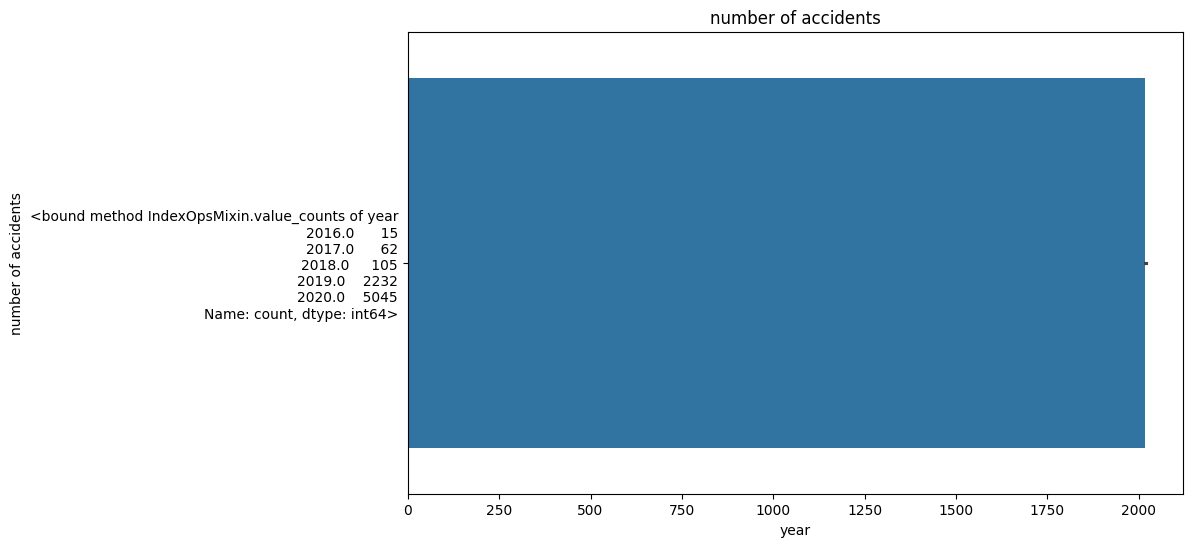

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=accidents_by_year.index , y=accidents_by_year.value_counts)
plt.title('number of accidents')
plt.xlabel('year')
plt.ylabel('number of accidents')
plt.show()

C:\Users\Jain\AppData\Local\Programs\Python\Python312\Scripts\ipykernel_11096\2290588590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad['Hour']=pd.to_datetime(ad['Start_Time']).dt.hour


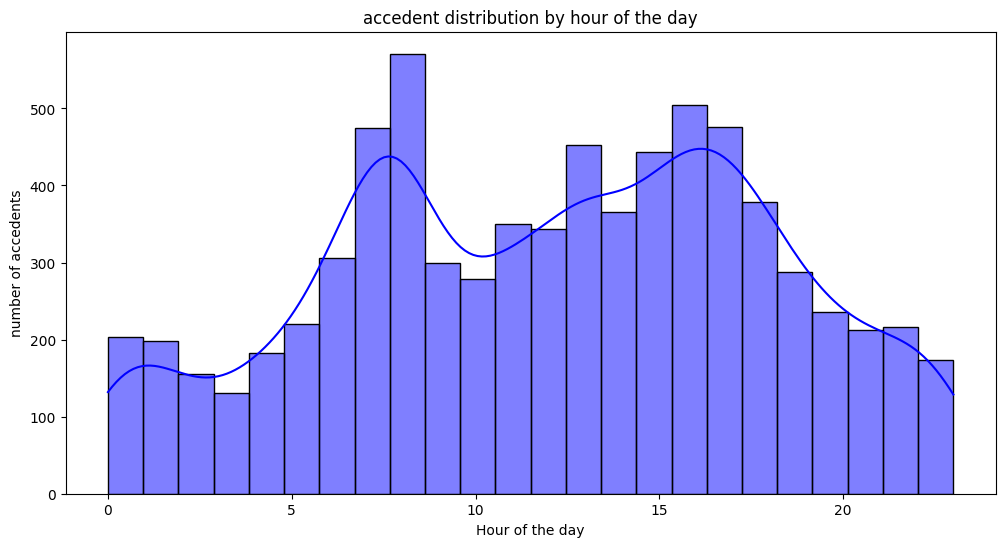

In [11]:
ad['Hour']=pd.to_datetime(ad['Start_Time']).dt.hour
plt.figure(figsize=(12,6))
sns.histplot(ad['Hour'],bins=24,kde=True,color='blue')
plt.title('accedent distribution by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('number of accedents')
plt.show()

In [53]:
#correlation heatmap

In [16]:
corr_matrix=ad.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='CoolWarm')
plt.title('correlation heatmap')
plt.show()

ValueError: could not convert string to float: 'A-1'

In [13]:
#geographicl visualization

In [15]:
fig=px.scatter_mapbox(ad,lat="Start_Lat",
                      lon="Start_Lng",
                      color="Severity",
                      size="Severity",
                      color_continuous_scale=px.colors.cyclical.IceFire,
                      size_max=12,      zoom=10,mapbox_style="carto-positron")
fig.update_layout(title="geographical distribution of accidents")
fig.show()